In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression

In [14]:
df =pd.read_csv('ST.csv')
df

,SR.No,Text,Timestamp,Username,Platform,Hashtags,Retweets,Likes,Country
0,1,Enjoying a beautiful day at the park! ...,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA
1,2,Traffic was terrible this morning. ...,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada
2,3,Just finished an amazing workout! 💪 ...,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA
3,4,Excited about the upcoming weekend getaway! ...,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK
4,5,Trying out a new recipe for dinner tonight. ...,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia
...,...,...,...,...,...,...,...,...,...
727,729,Collaborating on a science project that receiv...,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK
728,730,Attending a surprise birthday party organized ...,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA
729,731,Successfully fundraising for a school charity ...,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada
730,732,"Participating in a multicultural festival, cel...",29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK


In [15]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score for each text
def get_sentiment_score(Text):
    sentiment = sia.polarity_scores(Text)['compound']
    return sentiment

# Apply the sentiment analysis function to each text in the dataset
df['sentiment_score'] = df['Text'].apply(get_sentiment_score)

# Write the updated dataset with sentiment scores to a new CSV file
df.to_csv('sentiment_scores_dataset.csv', index=False)
df


,SR.No,Text,Timestamp,Username,Platform,Hashtags,Retweets,Likes,Country,sentiment_score
0,1,Enjoying a beautiful day at the park! ...,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,0.8221
1,2,Traffic was terrible this morning. ...,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,-0.4767
2,3,Just finished an amazing workout! 💪 ...,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,0.6239
3,4,Excited about the upcoming weekend getaway! ...,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,0.4003
4,5,Trying out a new recipe for dinner tonight. ...,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,0.0000
...,...,...,...,...,...,...,...,...,...,...
727,729,Collaborating on a science project that receiv...,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,0.8268
728,730,Attending a surprise birthday party organized ...,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,0.9551
729,731,Successfully fundraising for a school charity ...,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,0.9098
730,732,"Participating in a multicultural festival, cel...",29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,0.8977


In [16]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment into positive, negative, or neutral
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to get sentiment score for each text
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)['compound']
    return sentiment

# Apply the sentiment analysis function to each text in the dataset
df['Sentiment_score'] = df['Text'].apply(get_sentiment_score)

# Classify sentiment into categories
df['Sentiment'] = df['Sentiment_score'].apply(classify_sentiment)
df

,SR.No,Text,Timestamp,Username,Platform,Hashtags,Retweets,Likes,Country,sentiment_score,Sentiment_score,Sentiment
0,1,Enjoying a beautiful day at the park! ...,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,0.8221,0.8221,Positive
1,2,Traffic was terrible this morning. ...,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,-0.4767,-0.4767,Negative
2,3,Just finished an amazing workout! 💪 ...,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,0.6239,0.6239,Positive
3,4,Excited about the upcoming weekend getaway! ...,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,0.4003,0.4003,Positive
4,5,Trying out a new recipe for dinner tonight. ...,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,0.0000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
727,729,Collaborating on a science project that receiv...,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,0.8268,0.8268,Positive
728,730,Attending a surprise birthday party organized ...,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,0.9551,0.9551,Positive
729,731,Successfully fundraising for a school charity ...,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,0.9098,0.9098,Positive
730,732,"Participating in a multicultural festival, cel...",29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,0.8977,0.8977,Positive


In [17]:
# Splliting the Dataset into Training and Testing
features = ['Text','Hashtags','Likes','Retweets','Country']
target = 'sentiment_score'
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [18]:
# Check the unique values in y_train
print("Unique labels in y_train:", y_train.unique())

# If the labels are continuous, you might need to convert them to discrete classes.
# For example, if your labels are floats, you can convert them to integers:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


Unique labels in y_train: [ 0.6369 -0.6249  0.     -0.5719  0.7845  0.3612  0.6486  0.1531 -0.5994
  0.4588  0.5106  0.6249  0.3818  0.9313 -0.7845  0.7964  0.9169 -0.5106
 -0.2023  0.5994  0.872  -0.4215  0.8805  0.5267  0.4404 -0.886   0.7177
  0.4215  0.8883  0.7717  0.6808  0.7574  0.34    0.7003 -0.4199  0.875
 -0.3182  0.4003  0.9648  0.4585  0.2732  0.4926 -0.2732  0.7906  0.8126
 -0.2057 -0.296   0.6124 -0.0258  0.6908 -0.2144  0.8481  0.5255  0.6114
  0.296  -0.7269  0.8979  0.25    0.6597 -0.4939  0.7783 -0.7783  0.4939
 -0.34    0.743  -0.5267 -0.5848  0.802   0.128   0.7506  0.8718  0.7269
  0.7579  0.4767  0.1027 -0.743  -0.7579  0.7644 -0.6808 -0.1779  0.7351
 -0.872   0.7178 -0.8225  0.8225  0.5719  0.5423  0.4753 -0.4767  0.5411
  0.807   0.8221  0.6705 -0.5859 -0.7184  0.8316  0.6239  0.7959  0.1511
  0.7901  0.6177  0.8402 -0.8316  0.8689  0.7712  0.6886  0.7184  0.5574
  0.6696  0.4019 -0.0516  0.0258  0.8779 -0.4404 -0.6908  0.5859  0.9215
 -0.6124  0.9325  0.5848 -

In [19]:
# Convert sentiment scores to sentiment labels (positive, negative, neutral)
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Assuming 'sentiment_score' is the column containing sentiment scores
y = df['sentiment_score']
y_multiclass = y.apply(get_sentiment_label)

# Perform TF-IDF vectorization on the text data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_multiclass, test_size=0.2, random_state=42)

# Oversample the minority classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model for multi-class classification
model = LogisticRegression(multi_class='auto', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)


Accuracy: 0.7891156462585034

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.74      0.77        39
     neutral       0.40      0.31      0.35        13
    positive       0.82      0.87      0.85        95

    accuracy                           0.79       147
   macro avg       0.68      0.64      0.66       147
weighted avg       0.78      0.79      0.78       147



In [20]:
# Convert sentiment scores to sentiment labels (positive, negative, neutral)
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Assuming 'sentiment_score' is the column containing sentiment scores
y = df['sentiment_score']
y_multiclass = y.apply(get_sentiment_label)

# Perform TF-IDF vectorization on the text data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_multiclass, test_size=0.2, random_state=42)

# Oversample the minority classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and train the SVM model for multi-class classification
model = SVC(kernel='linear')
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)


Accuracy: 0.782312925170068

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.74      0.78        39
     neutral       0.25      0.15      0.19        13
    positive       0.81      0.88      0.84        95

    accuracy                           0.78       147
   macro avg       0.63      0.59      0.61       147
weighted avg       0.76      0.78      0.77       147



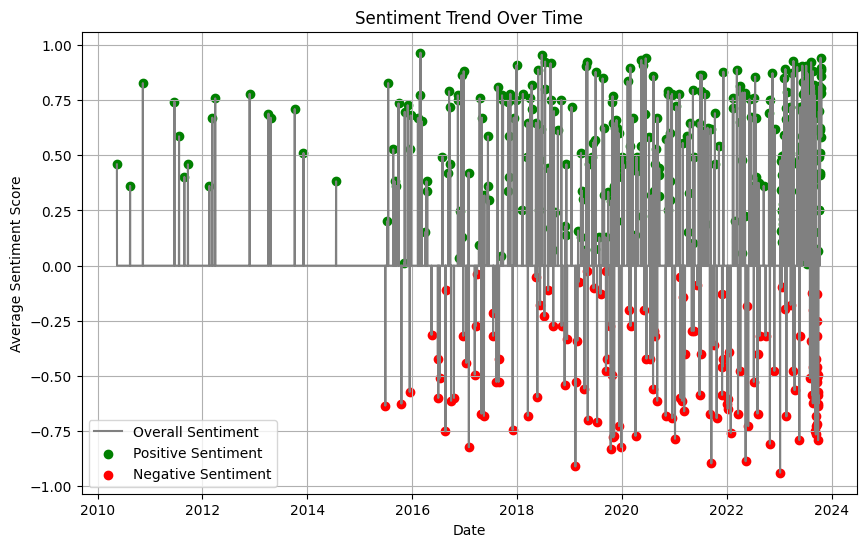

In [21]:
# Convert the timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Define the time window for trend analysis (e.g., daily, weekly)
time_window = 'D'  # 'D' for daily, 'W' for weekly, 'M' for monthly, etc.

# Aggregate sentiment scores within each time window
df.set_index('Timestamp', inplace=True)
sentiment_trend = df['Sentiment_score'].resample(time_window).mean().fillna(0)

# Separate positive and negative sentiment scores
positive_sentiment = sentiment_trend[sentiment_trend > 0]
negative_sentiment = sentiment_trend[sentiment_trend < 0]

# Plot the trend in sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, color='gray', label='Overall Sentiment')
plt.scatter(positive_sentiment.index, positive_sentiment.values, color='green', label='Positive Sentiment')
plt.scatter(negative_sentiment.index, negative_sentiment.values, color='red', label='Negative Sentiment')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.savefig('sentiment_trend.png')  # Save the plot as an image
plt.show()

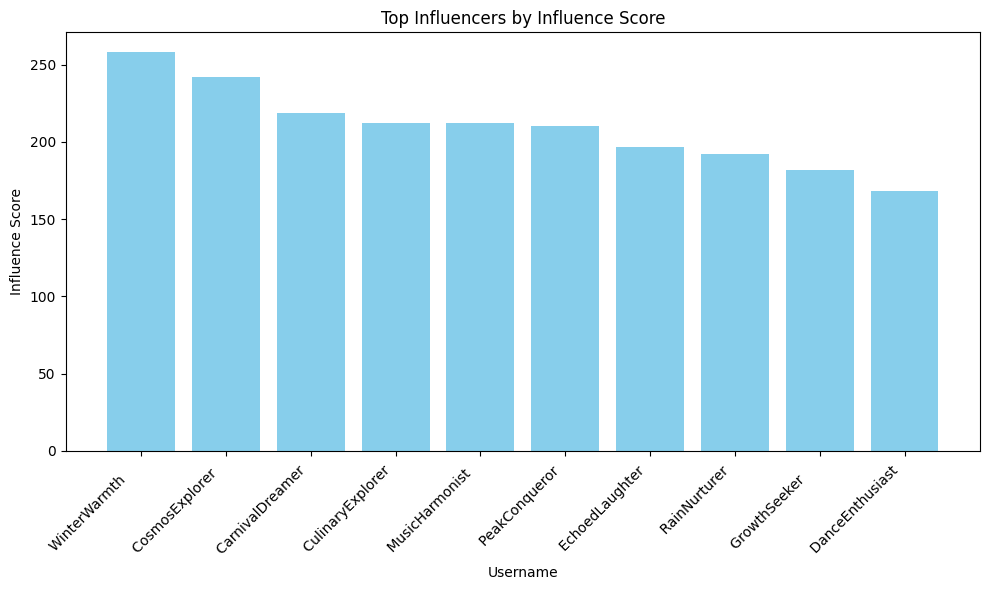

In [22]:
# Aggregate metrics: Total retweets, total likes, and frequency of mentions
influence_metrics = df.groupby('Username').agg({
    'Retweets': 'sum',
    'Likes': 'sum',
    'SR.No': 'count'  # Frequency of mentions
}).rename(columns={'SR.No': 'Mentions'}).reset_index()

# Rank influencers based on aggregated metrics
influence_metrics['Influence_score'] = influence_metrics['Retweets'] + influence_metrics['Likes'] + influence_metrics['Mentions']
influence_metrics.sort_values(by='Influence_score', ascending=False, inplace=True)

# Visualize influence metrics
plt.figure(figsize=(10, 6))
plt.bar(influence_metrics['Username'][:10], influence_metrics['Influence_score'][:10], color='skyblue')
plt.title('Top Influencers by Influence Score')
plt.xlabel('Username')
plt.ylabel('Influence Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Assuming 'new_text' contains the new text input and 'new_likes' and 'new_retweets' contain the corresponding likes and retweets
new_text = "Have a bad day "

# Preprocess the new text input using TF-IDF vectorizer
new_text_tfidf = tfidf_vectorizer.transform([new_text])

# Predict sentiment for the new text input
predicted_sentiment = model.predict(new_text_tfidf)[0]

print("Final Sentiment:", predicted_sentiment)


Final Sentiment: positive
